# Loading the modules and csv

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns # for visualization

In [4]:
from pylab import savefig

In [5]:
file_path = 'C://Users//Sanyal//Desktop/train.csv'

In [6]:
df = pd.read_csv(file_path)

In [7]:
## sample = df

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [8]:
df.isna().sum()/len(df)*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

# EDA

0    187437
1     58288
Name: Is_Lead, dtype: int64


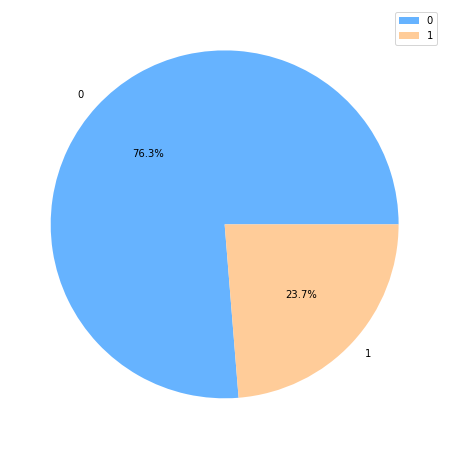

In [9]:
plt.figure(figsize = (12,8))
print(df['Is_Lead'].value_counts())
colors = ['#66b3ff','#ffcc99']
plt.pie(df['Is_Lead'].value_counts(), labels = ['0','1'], autopct='%.1f%%',colors= colors)
plt.legend()
plt.show()

In [10]:
## Above graph shows only 23.70% of the given data is a Lead. 
##Hence ML model will have less data to learn from.

Text(0.5, 1.0, 'Gender Wise Customer Response in the Recommended Credit Cards')

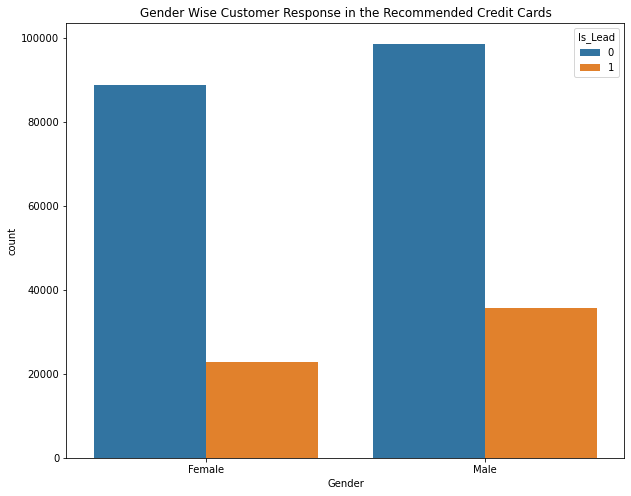

In [11]:
plt.figure(figsize = (10,8))
sns.countplot(x='Gender', hue='Is_Lead', data=df).set_title('Gender Wise Customer Response in the Recommended Credit Cards')

In [12]:
## the above graph shows that male customers ahve responded better compared to female candidates.

C:\Users\Sanyal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Occupation Wise Customer Response in the Recommended Credit Cards')

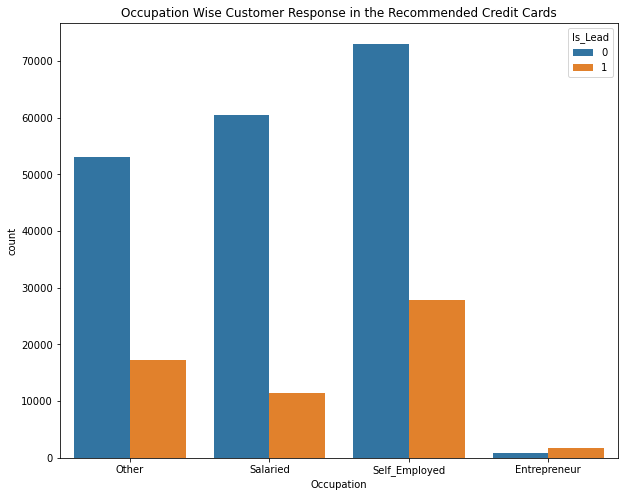

In [13]:
plt.figure(figsize = (10,8))
sns.countplot('Occupation', hue = 'Is_Lead', data =df).set_title('Occupation Wise Customer Response in the Recommended Credit Cards')

In [14]:
## From the above graph we can conclude following points :
## 1. Self employed customers are more likely to buy credit card.
## 2. Entrepreneurs are the most likely customers for credit card,
##        as they have reponded multiple times for credit card services.

C:\Users\Sanyal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Channel Code Wise Customer Response in the Recommended Credit Cards')

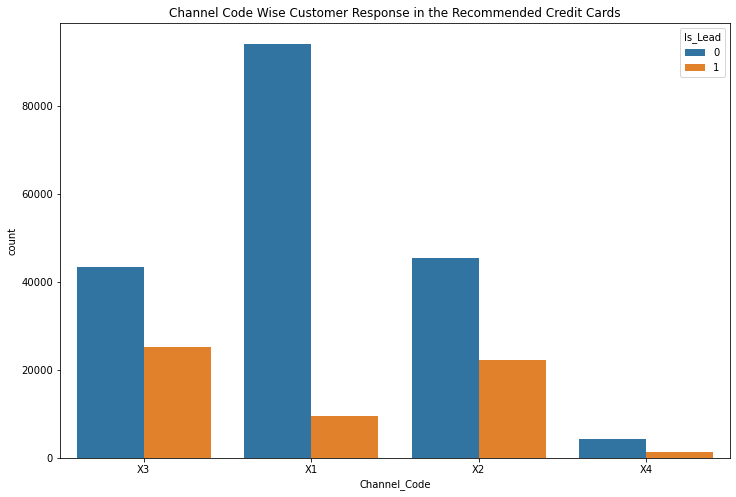

In [15]:
plt.figure(figsize = (12,8))
sns.countplot('Channel_Code', hue = 'Is_Lead', data = df).set_title('Channel Code Wise Customer Response in the Recommended Credit Cards')

In [16]:
## Channel X2 have the best lead generation ratio compared to others.
## Cahnnel X1 performance is poor.

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

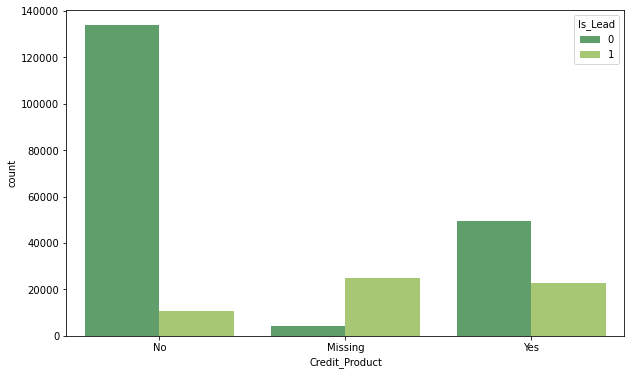

In [17]:
plt.figure(figsize = (10,6))
sns.countplot(data=df.fillna('Missing'), x='Credit_Product', hue='Is_Lead', palette='summer')

In [18]:
## It is very intresting to observe that the missing values do actually have more leads. 
## Thus we should fill the missing values.

C:\Users\Sanyal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


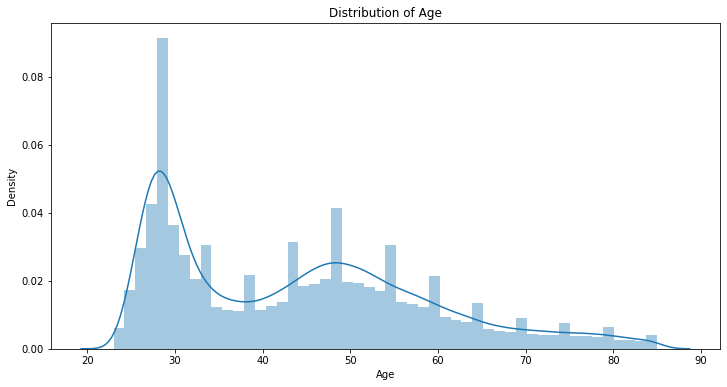

In [19]:
# Age: Age of the Customer (in Years)

plt.figure(figsize=(12, 6))
ax = sns.distplot(df.Age)
ax.set_title('Distribution of Age')
plt.show()

In [20]:
df.corr().transpose()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Age,1.000000,0.631242,0.145232,0.230814
Vintage,0.631242,1.000000,0.167433,0.279642
Avg_Account_Balance,0.145232,0.167433,1.000000,0.053370
Is_Lead,0.230814,0.279642,0.053370,1.000000


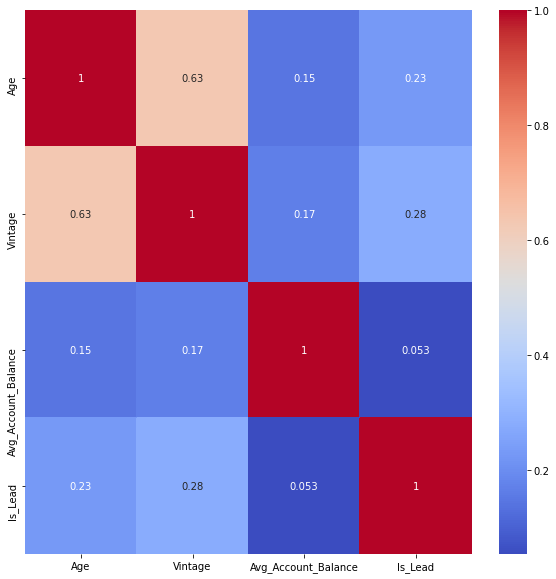

In [21]:
plt.figure(figsize= (10,10))
svm = sns.heatmap(df.corr(), annot= True, cmap= 'coolwarm')
#hm = sns.get_figure()
svm.figure.savefig('svm_conf.png', dpi=400)

# Pre-Processing

##  encoding the string

In [22]:
df['Credit_Product'] = df['Credit_Product'].fillna('Not Sure')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       245725 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [24]:
df['Credit_Product'].unique()

array(['No', 'Not Sure', 'Yes'], dtype=object)

In [25]:
df['Gender'] = df['Gender'].astype("category")
Gender_cats = df["Gender"].cat.categories
df["Gender"] = df["Gender"].cat.codes

In [26]:
df['Region_Code'] = df['Region_Code'].astype("category")
Region_Code_cats = df["Region_Code"].cat.categories
df["Region_Code"] = df["Region_Code"].cat.codes

In [27]:
df['Occupation'] = df['Occupation'].astype("category")
Occupation_cats = df["Occupation"].cat.categories
df["Occupation"] = df["Occupation"].cat.codes

In [28]:
df['Channel_Code'] = df['Channel_Code'].astype("category")
Channel_Code_cats = df["Channel_Code"].cat.categories
df["Channel_Code"] = df["Channel_Code"].cat.codes

In [29]:
df['Is_Active'] = df['Is_Active'].astype("category")
Is_Active_Product_cats = df["Is_Active"].cat.categories
df["Is_Active"] = df["Is_Active"].cat.codes

In [30]:
df['Credit_Product'] = df['Credit_Product'].astype("category")
Credit_product_cats = df["Credit_Product"].cat.categories
df["Credit_Product"] = df["Credit_Product"].cat.codes

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  int8  
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  int8  
 4   Occupation           245725 non-null  int8  
 5   Channel_Code         245725 non-null  int8  
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       245725 non-null  int8  
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  int8  
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), int8(6), object(1)
memory usage: 10.8+ MB


# splitting the data

In [32]:
X,y = df.drop(['ID','Is_Lead'], axis=1), df['Is_Lead']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

In [35]:
print(X.shape, y.shape)

(245725, 9) (245725,)


In [36]:
print(X_train.shape,y_train.shape)

(184293, 9) (184293,)


In [37]:
print(X_test.shape,y_test.shape)

(61432, 9) (61432,)


In [38]:
X_test

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
87863,0,26,27,2,0,19,0,2249804,1
3228,1,33,20,2,0,25,0,988585,0
80609,0,28,18,2,0,19,0,813682,1
6659,1,29,4,2,0,31,0,3869826,1
68646,1,60,33,3,2,110,2,2092372,1
...,...,...,...,...,...,...,...,...,...
209627,0,47,4,1,1,61,1,672510,1
22431,1,56,25,3,2,99,0,352413,1
42991,0,30,28,3,0,33,0,1210738,0
166003,0,28,27,2,0,19,2,717064,0


# Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# model training

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [41]:
classifier.score(X_train,y_train)

0.9834556928369499

# confusion matrix 

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[44000  2853]
 [ 6575  8004]]


0.8465294960281287

# Loading the test data

In [43]:
file_path = 'C:/Users/Sanyal/Desktop/test.csv'

In [44]:
test = pd.read_csv(file_path)

In [45]:
test.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
5,MZZAQMPT,Male,60,RG268,Self_Employed,X3,110,No,4624262,No
6,Y88TW36I,Female,69,RG253,Other,X2,67,No,1032764,No
7,3UGOAQNU,Female,30,RG257,Salaried,X1,33,No,837009,No
8,VVUKMUJT,Male,43,RG284,Salaried,X3,81,NaN,1001232,Yes
9,9R363ZXS,Female,54,RG283,Self_Employed,X2,37,Yes,1667851,No


# pre processing the test data

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [34]:
test.isna().sum()/len(df)*100

ID                     0.000000
Gender                 0.000000
Age                    0.000000
Region_Code            0.000000
Occupation             0.000000
Channel_Code           0.000000
Vintage                0.000000
Credit_Product         5.095941
Avg_Account_Balance    0.000000
Is_Active              0.000000
dtype: float64

In [47]:
test['Credit_Product'] = test['Credit_Product'].fillna('Not Sure')

In [48]:
test.isna().sum()/len(df)*100

ID                     0.0
Gender                 0.0
Age                    0.0
Region_Code            0.0
Occupation             0.0
Channel_Code           0.0
Vintage                0.0
Credit_Product         0.0
Avg_Account_Balance    0.0
Is_Active              0.0
dtype: float64

# encoding the string values on test data set

In [49]:
col = ['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active']

test['Gender'] = test['Gender'].astype("category")
Gender_cats = test["Gender"].cat.categories
test["Gender"] = test["Gender"].cat.codes

In [50]:
test['Region_Code'] = test['Region_Code'].astype("category")
Region_Code_cats = test["Region_Code"].cat.categories
test["Region_Code"] = test["Region_Code"].cat.codes

In [51]:
test['Occupation'] = test['Occupation'].astype("category")
Occupation_cats = test["Occupation"].cat.categories
test["Occupation"] = test["Occupation"].cat.codes

In [52]:
test['Channel_Code'] = test['Channel_Code'].astype("category")
Channel_Code_cats = test["Channel_Code"].cat.categories
test["Channel_Code"] = test["Channel_Code"].cat.codes

In [53]:
test['Is_Active'] = test['Is_Active'].astype("category")
Is_Active_Product_cats = test["Is_Active"].cat.categories
test["Is_Active"] = test["Is_Active"].cat.codes

In [54]:
test['Credit_Product'] = test['Credit_Product'].astype("category")
Credit_product_cats = test["Credit_Product"].cat.categories
test["Credit_Product"] = test["Credit_Product"].cat.codes

In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  int8  
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  int8  
 4   Occupation           105312 non-null  int8  
 5   Channel_Code         105312 non-null  int8  
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       105312 non-null  int8  
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  int8  
dtypes: int64(3), int8(6), object(1)
memory usage: 3.8+ MB


# preparing data for model

In [56]:
test = test.drop(['ID'], axis=1)

In [57]:
test.shape

(105312, 9)

In [58]:
X_Test = test

In [59]:
sct = StandardScaler()
X_Test = sct.fit_transform(X_Test)

In [60]:
y_Test = classifier.predict(X_Test)

In [61]:
y_Test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
result = pd.DataFrame (y_Test)

In [63]:
file_path = 'C:/Users/Sanyal/Desktop/submition.xlsx'

In [64]:
result.to_excel(file_path,sheet_name="Sheet1",index=False,index_label=None)